# Importing Dataset 

In [1]:
import pandas as pd
df=pd.read_csv('auto.csv')
# df.head()
# df.tail()
# df.describe(include="all")

Headers

In [99]:
headers=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv('auto.csv',names = headers)

In [100]:
#df.describe()
#df[["symboling","normalized-losses"]].describe()
# clicking h gives you short cuts 
# df.index.name="Number"
# df

# Data Wrengling  

Dealing missing values

In [2]:
import numpy as np


Replace "?" to NaN

In [104]:
df.replace("?", np.nan, inplace = True)

missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Counting missing vaslues

In [107]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")




symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

###### Mean value fornormalized lossses

In [5]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
# print("Average of normalized-losses:", avg_norm_loss)avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)



Average of normalized-losses: 122.0


### Replace NaN in normalized loassswith mean 


In [6]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

### Calculatethe mean valuefor the bore


In [7]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


### Replace NaN with mean 


In [8]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

### Convert data to proper formate

In [9]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

### Convert mpg to L/100km by mathematical operation (235 divided by mpg)


In [10]:
df['city-L/100km'] = 235/df["city-mpg"]

### Check your transformed data

In [11]:
# df.head()

## Data normalization

### Replace (original value) by (original value)/(maximum value)

In [12]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

## Binning

In [13]:
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

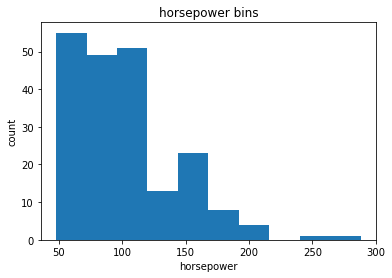

In [14]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")


### Set x/y labels and plot title

In [15]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [16]:
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,160,Medium


In [17]:
df["horsepower-binned"].value_counts()

Low       163
Medium     40
High        2
Name: horsepower-binned, dtype: int64

### Hstogram for Each Bin

<BarContainer object of 3 artists>

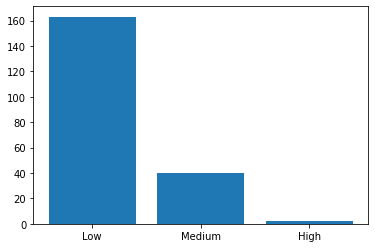

In [18]:
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

### Set x/y labels and plot title

<BarContainer object of 3 artists>

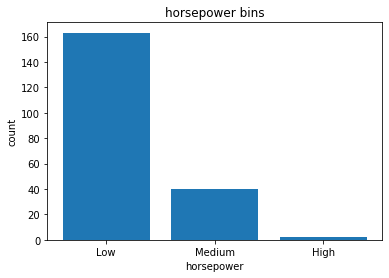

In [19]:
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

### Dummy variable

In [20]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [21]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head() 

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


### Merge data frame "df" and "dummy_variable_1" 

In [22]:
df = pd.concat([df, dummy_variable_1], axis=1)

### Drop original column "fuel-type" from "df"

In [23]:
# df.drop("fuel-type", axis = 1, inplace=True)

# df.head()

# Exploratory Data Analysis 

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### List the data types for each column

In [25]:
# print(df.dtypes)

### For contnous
positve lnear relationship
Engine size as potential predictor variable of price


(0.0, 52487.75352494474)

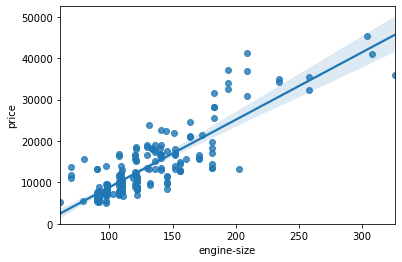

In [96]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [27]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

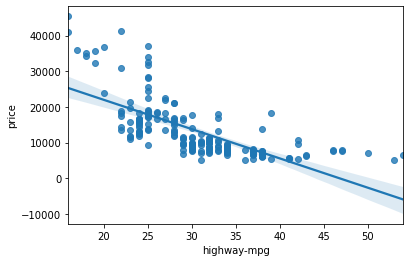

In [28]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [29]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

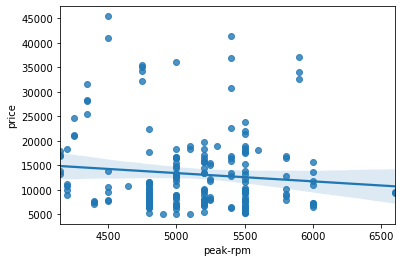

In [30]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [31]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101649
price,-0.101649,1.000000


### For Catagorical

<AxesSubplot:xlabel='body-style', ylabel='price'>

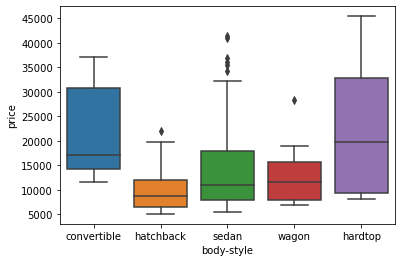

In [32]:
sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

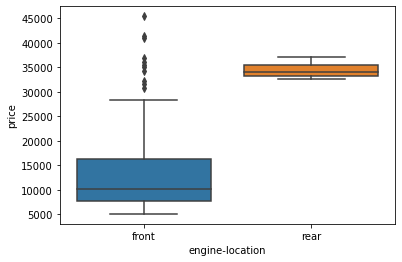

In [33]:
sns.boxplot(x="engine-location", y="price", data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

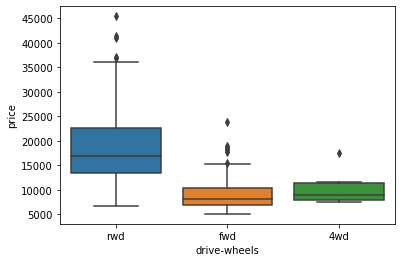

In [34]:
sns.boxplot(x="drive-wheels", y="price", data=df)

In [35]:
# df.describe()

In [36]:
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


In [37]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [38]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,120
rwd,76
4wd,9


In [39]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,120
rwd,76
4wd,9


In [40]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,120
rwd,76
4wd,9


### Engine-location as variable

In [41]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head()

,value_counts
engine-location,
front,202
rear,3


### Basics of grouping

In [42]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [43]:
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one.head(5)

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


### Grouping results

In [44]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


### Grouping Results

In [45]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
# grouped_test1

In [46]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [47]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline 

### Use the grouped Results

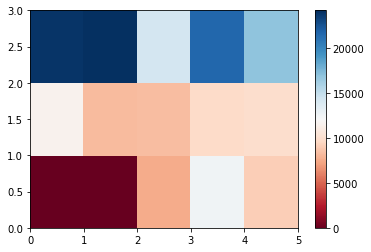

In [49]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

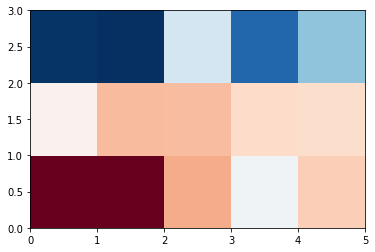

In [50]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

### Label Names

In [51]:
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

### Move ticks and labels to the center

In [52]:
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

### Insert labels

In [53]:
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

[Text(0, 0.5, '4wd'), Text(0, 1.5, 'fwd'), Text(0, 2.5, 'rwd')]

### Rotate label if too Long

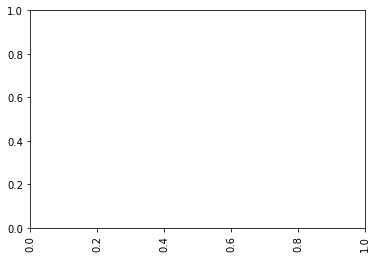

In [54]:
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### Correlation and causation 

In [55]:
# df.corr()

In [56]:
from scipy import stats

In [57]:
avg_price = df["price"].astype("float").mean(axis=0)
df["price"].replace(np.nan, avg_price, inplace=True)
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5831681499789547  with a P-value of P = 4.527625545686765e-20


In [58]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.7579459704465279  with a P-value of P =  1.5908319572201292e-39


In [59]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

The Pearson Correlation Coefficient is 0.6829862954386219  with a P-value of P =  1.6498873291218535e-29


In [60]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7286988175931832  with a P-value of P = 3.2145204838053955e-35


### ANOVA

In [61]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
9,4wd,NaN


In [62]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
200,rwd,sedan,16845.0
201,rwd,sedan,19045.0
202,rwd,sedan,21485.0
203,rwd,sedan,22470.0


In [63]:
grouped_test2.get_group('4wd')['price']

4      17450.0
9          NaN
140     7603.0
144     9233.0
145    11259.0
148     8013.0
149    11694.0
154     7898.0
155     8778.0
Name: price, dtype: float64

### ANOVA

In [64]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= nan , P = nan


In [65]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= nan , P = nan


# Model Development

## Linear Regression and Multiple Linear Regression

#### Linear Regression

#### Simple Linear Regression 

In [66]:
from sklearn.linear_model import LinearRegression

# Create the linear regression object:
lm = LinearRegression()

# How could "highway-mpg" help us predict car price?
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X,Y)

LinearRegression()

In [67]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16166.94140528, 16166.94140528, 16955.96802513, 13799.86154571,
       20112.07450456])

##### X Response variable Y predictor variable
##### Yhat=a+bX

In [68]:
lm.score(X,Y)

0.47682578947968457

The above model is 47.6% accurate which is very low accuraucy.

In [69]:
# What is the value of the intercept (a)
lm.intercept_

37470.66014138312

In [70]:
# What is the value of the slope (b)?
lm.coef_

array([-789.02661986])

What is the final estimated linear model we get?
As we saw above, we should get a final linear model with the structure:

Yhat=a+bX
 
Plugging in the actual values we get:

Price = 38423.31 - 821.73 x highway-mpg

#### Multiple Linear Regression
What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can 
generalize to any integer:

##### Y:Response Variable
* X_1:Predictor Variable 1
* X_2:Predictor Variable 2
* X_3:Predictor Variable 3
* X_4:Predictor Variable 4

##### Y:Response Variable
* X_1:Predictor Variable 1
* X_2:Predictor Variable 2
* X_3:Predictor Variable 3
* X_4:Predictor Variable 4

##### a:intercept
* b_1:coefficients of Variable 1
* b_2:coefficients of Variable 2
* b_3:coefficients of Variable 3
* b_4:coefficients of Variable 4

##### a:intercept
* b_1:coefficients of Variable 1
* b_2:coefficients of Variable 2
* b_3:coefficients of Variable 3
* b_4:coefficients of Variable 4

##### The equation is given by:
* Yhat=a+b_1X_1+b_2X_2+b_3X_3+b_4X_4
* Yhat=a+b_1X_1+b_2X_2+b_3X_3+b_4X_4

 
#### From the previous section we know that other good predictors of price could be:

* Horsepower
* Curb-weight
* Engine-size
* Highway-mpg

Let's develop a model using these variables as the predictor variables.

In [71]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

lm.fit(Z, df['price'])


LinearRegression()

In [72]:
lm.score(Z, df['price'])

0.776216755300364

The above model is 77.6% accurate

In [73]:
lm.intercept_

-9242.916680085284

In [74]:
lm.coef_

array([ 18.14725936,   3.80621055, 101.10676267, -65.040733  ])

What is the final estimated linear model that we get?
As we saw above, we should get a final linear function with the structure:

* Yhat=a+b_1X_1+b_2X_2+b_3X_3+b_4X_4
* Yhat=a+b_1X_1+b_2X_2+b_3X_3+b_4X_4

What is the linear function we get in this example?
* Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg


### Model Evaluation Using Visualization

In [75]:
import seaborn as sns

### High way potential pridector of price

#### Regression Plot
When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize highway-mpg as potential predictor variable of price:

(0.0, 48123.41602561958)

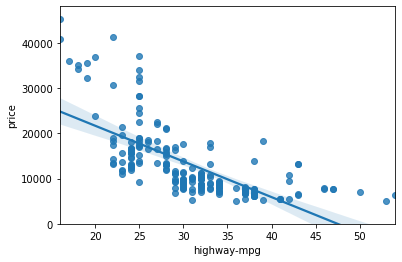

In [76]:
# plt.figure(figsize=(5,6))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".

### Regrission plot of peak 

(0.0, 47414.1)

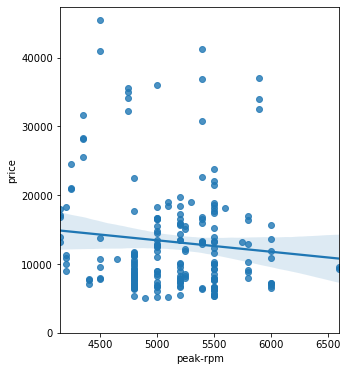

In [77]:
plt.figure(figsize=(5,6))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

C:\Users\Shakir Srkian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


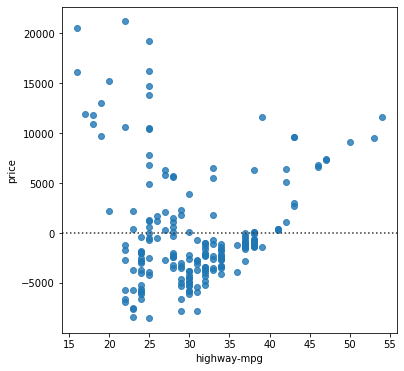

In [78]:
plt.figure(figsize=(6,6))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

##### Residual Plot
A good way to visualize the variance of the data is to use a residual plot.

#### What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

#### So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

* What do we pay attention to when looking at a residual plot?

#### We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

* Why is that? 

Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

###### What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

### Multiple Linear Regression
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

#### First, let's make a prediction:

C:\Users\Shakir Srkian\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Shakir Srkian\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


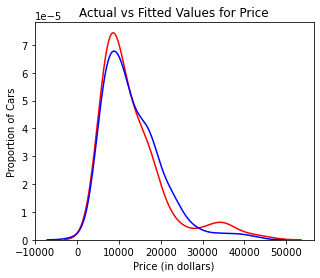

In [80]:
Y_hat = lm.predict(Z) 
plt.figure(figsize=(5,4))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. 
However, there is definitely some room for improvement.
#### 3. Polynomial Regression and Pipelines
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.
We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.
#### There are different orders of polynomial regression:
Quadratic - 2nd Order

* Yhat=a+b1X+b2X2
* Yhat=a+b1X+b2X2

Cubic - 3rd Order

* Yhat=a+b1X+b2X2+b3X3
* Yhat=a+b1X+b2X2+b3X3

Higher-Order:

* Y=a+b1X+b2X2+b3X3....
* Y=a+b1X+b2X2+b3X3....

We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. 
Let's see if we can try fitting a polynomial model to the data instead.
##### We will use the following function to plot the data:



In [86]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel('Name')
    plt.ylabel('Price of Cars')


    plt.show()
    plt.close()

### Here we use a Polynomial of the 3rd Order (Cubic) 

In [87]:
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)

In [88]:
p = np.poly1d(f)
print(p)

        3         2
-1.641 x + 213.4 x - 9226 x + 1.402e+05


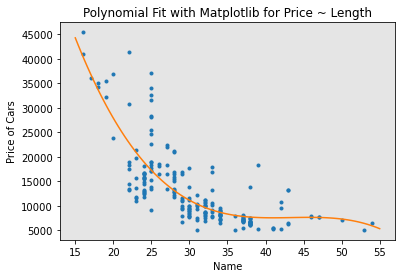

In [89]:
PlotPolly(p, x, y, 'highway-mpg')

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

In [90]:
np.polyfit(x, y, 3)

array([-1.64053866e+00,  2.13411821e+02, -9.22561090e+03,  1.40157828e+05])

In [89]:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=2)
pr

Z_pr=pr.fit_transform(Z)

Z.shape

(205, 4)

In [90]:
Z_pr.shape

(205, 15)

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

pipe=Pipeline(Input)
pipe

Z = Z.astype(float)
pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:4]



array([13352.64974088, 13352.64974088, 18146.2361768 , 10728.16584333])

### 4. Measures for In-Sample Evaluation
When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

#### Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

### Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

### Model 1: Simple Linear Regression
Let's calculate the R^2:

#highway_mpg_fit

#### Highway_mpg_fit

In [92]:
lm.fit(X, Y)

LinearRegression()

#### Find the R^24

In [93]:
print('The R-square is: ', lm.score(X, Y))

Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The R-square is:  0.47682578947968457
The output of the first four predicted value is:  [16166.94140528 16166.94140528 16955.96802513 13799.86154571]


In [94]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  32235628.28938213


## Model 2 MultipleLinear Regression 

#### fit the model 

In [95]:
lm.fit(Z, df['price'])

LinearRegression()

#### Find the R^2

In [96]:
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.776216755300364


In [97]:
Y_predict_multifit = lm.predict(Z)

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  13788511.261583272


### Model 3: Polynomial Fit
Let's calculate the R^2.

Let’s import the function r2_score from the module metrics as we are using a different function.

In [98]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6611451838336795


### MSE
We can also calculate the MSE:

In [99]:
mean_squared_error(df['price'], p(x))

20878700.97255159

### Prediction and Decision Making
Prediction
In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [100]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

new_input=np.arange(1, 100, 1).reshape(-1, 1)

lm.fit(X, Y)
lm

LinearRegression()

In [101]:
yhat=lm.predict(new_input)
yhat[0:5]

array([36681.63352153, 35892.60690167, 35103.58028182, 34314.55366196,
       33525.5270421 ])

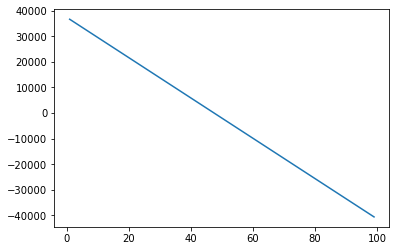

In [102]:
plt.plot(new_input, yhat)
plt.show()

### Decision Making: Determining a Good Model Fit
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

**What is a good R-squared value?**
When comparing models, the model with the higher R-squared value is a better fit for the data.

**What is a good MSE?**
When comparing models, the model with the smallest MSE value is a better fit for the data.

Let's take a look at the values for the different models.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
**MSE: 3.16 x10^7**
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7

**Polynomial Fit:** Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
**MSE: 2.05 x 10^7**

Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)

Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.

In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

**MSE:** The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.

**R-squared:** In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

Simple Linear Model (SLR) vs. Polynomial Fit

MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.

R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.

Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

Multiple Linear Regression (MLR) vs. Polynomial Fit

**MSE:** The MSE for the MLR is smaller than the MSE for the Polynomial Fit.

**R-squared:** The R-squared for the MLR is also much larger than for the Polynomial Fit.

## Conclusion

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.

# Model Evaluation and Refinment 

### This function will download the dataset into your browser

In [103]:
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes()

In [104]:
# import pandas as pd
# import numpy as np


# path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'


# #you will need to download the dataset; if you are running locally, please comment out the following 
# await download(path, "auto.csv")
# path="auto.csv"

# df = pd.read_csv(path)

# df.to_csv('module_5_auto.csv')

# df=df._get_numeric_data()
# df.head()

In [105]:
from ipywidgets import interact, interactive, fixed, interact_manual

### Functions for Plotting

In [106]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize=(6,5))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [107]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    plt.figure(figsize=(6,5))

In [108]:
#     training data 
#     testing data 
#     lr:  linear regression object 
#     poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

IndentationError: unexpected indent (<ipython-input-108-93ccc81cdd4f>, line 6)

<h2 id="ref1">Part 1: Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>


In [111]:
y_data = df['price']

Drop price data in dataframe **x_data**:


In [112]:
x_data=df.drop('price',axis=1)

Now, we randomly split our data into training and testing data using the function <b>train_test_split</b>.


In [113]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 184


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.


In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
lre=LinearRegression()

In [116]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [117]:
lre.score(x_test[['horsepower']], y_test)

0.5668359684773733

In [118]:
lre.score(x_train[['horsepower']], y_train)

0.5721670146902664

### Cross Validation Score

In [119]:
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

Rcross

array([0.68660246, 0.49763681, 0.28254947, 0.29055767])

In [120]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.4393366020633017 and the standard deviation is 0.16677581990381674


In [121]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([27010040.81189358, 45588389.45678905, 34599239.81375541,
       13072289.12756209])

In [122]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([13797.45990216, 13797.45990216, 19496.56488148, 12604.62397625,
       14327.60920256])

<h2 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h2>

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>

In [123]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [124]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 5722.44253021, 10767.69656541,  8686.81344999, 15396.79416609,
        6653.12084601])

In [125]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([ 6258.20565841,  7026.05898687,  6302.6501157 ,  5054.82536727,
       10242.0325362 ])

C:\Users\Shakir Srkian\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Shakir Srkian\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<Figure size 864x720 with 0 Axes>

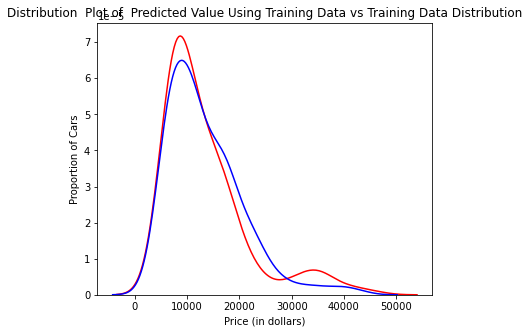

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\Shakir Srkian\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Shakir Srkian\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


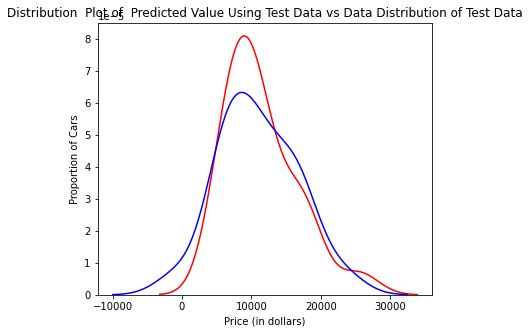

In [127]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.


So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.


<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [128]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


Let's use 55 percent of the data for training and the rest for testing:


In [210]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [211]:
poly = LinearRegression()

In [212]:
poly.fit(x_train, y_train)

C:\Users\Shakir Srkian\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

In [213]:
yhat = poly.predict(x_test)
yhat[0:5]

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [214]:
print("Predicted values:", yhat[0:4])

Predicted values: [ 5572.97616419 19239.97337927 12893.31056258  8001.74408026]


In [131]:
print("True values:", y_test[0:4].values)

True values: [ 6795. 15750. 15250.  5151.]


In [132]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

poly.score(x_train_pr, y_train)

poly.score(x_test_pr, y_test)

NameError: name 'x_train_pr' is not defined

<Figure size 432x360 with 0 Axes>

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.


R^2 of the training data:

Text(3, 0.75, 'Maximum R^2 ')

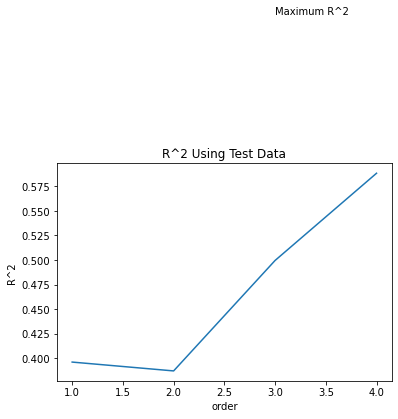

In [215]:
Rsqu_test = []
order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [216]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)
    

interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))


interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<h2 id="ref3">Part 3: Ridge Regression</h2> 

In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data.


In [217]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [218]:
from sklearn.linear_model import Ridge

RigeModel=Ridge(alpha=1)

RigeModel.fit(x_train_pr, y_train)

yhat = RigeModel.predict(x_test_pr)

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 5572.97616419 19239.97337927 12893.31056258  8001.74408026]
test set : [ 6795. 15750. 15250.  5151.]


100%|███████████████████████████████████████| 1000/1000 [00:06<00:00, 143.81it/s, Test Score=0.0912, Train Score=0.876]


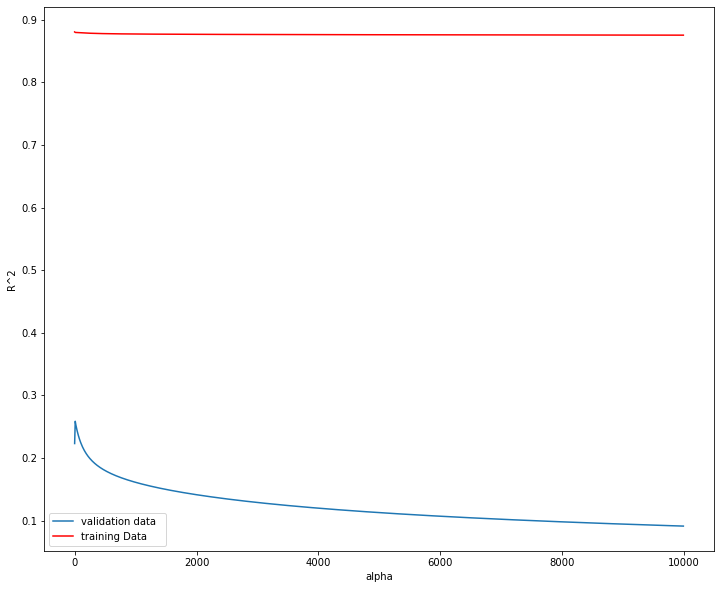

In [219]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)



width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


<h2 id="ref4">Part 4: Grid Search</h2>


The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.

In [220]:
from sklearn.model_selection import GridSearchCV

In [221]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [222]:
RR=Ridge()
RR

Ridge()

In [223]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [224]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [225]:
BestRR=Grid1.best_estimator_
BestRR


Ridge(alpha=1000)

In [226]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test) 


0.7078955904849467